230607 수요일 군AI 실습 자료입니다.   
본 내용은 IIPL (Intelligent Information Processing Lab) 소속 석사과정 유승욱 조교가 작성하였습니다.   
참고 자료: Q Learning with OpenAI Gym

> Lecture 6 
- Frozen Lake: Set Environment
- Frozen Lake: Training
- Frozen Lake: Results

### Libraries

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Frozen Lake: Set Environment

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
""" TODO: Define state & action size """

# Define state & action size
state_size  = env.observation_space.n
action_size = env.action_space.n

print(f'Actions: {action_size}, States: {state_size}')

Actions: 4, States: 16


In [4]:
""" TODO: Define Q matrix using np.zeros """

# Define Q matrix
Q = np.zeros((state_size, action_size))

print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
""" TODO: Return new state, reward, and so on """

# Check some random actions
env.reset()
for i in range(10):
  random_act = env.action_space.sample()
  new_state, reward, done, info = env.step(random_act)
  prob = info['prob']
  #env.render()
  
  print(f'new state: {new_state}, reward: {reward}, done: {done}, prob: {info}')
  
  if done: break

new state: 0, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 1, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 1, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 1, reward: 0.0, done: False, prob: {'prob': 0.3333333333333333}
new state: 5, reward: 0.0, done: True, prob: {'prob': 0.3333333333333333, 'TimeLimit.truncated': False}


### Frozen Lake: Training

In [26]:
""" TODO: Set your own hyper-parameters """

# Set hyper-parameters
lr    = 0.70
gamma = 0.90

num_episodes = 2000
max_steps    = 99

In [27]:
""" TODO: Define your Q-learning algorithm """

reward_lst = []

for episode in tqdm(range(num_episodes)):
  # Reset environment
  state = env.reset()
  rewards = 0
  done = False

  # Decay epsilon greedy
  e = 1 / ((i//100) + 1)

  # Continue until 'max_steps per episode' or 'done'
  step = 0
  while step < max_steps:
    step += 1

    # Choose an action by epsilon
    if np.random.rand(1) < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    # Update new_state, reward
    new_state, reward, done, info = env.step(action)

    # Update Q matrix & values
    Q[state, action] = Q[state, action] +\
                       lr * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
    rewards += reward
    state = new_state

    if done == True: break

  reward_lst.append(rewards)

100%|██████████| 2000/2000 [00:01<00:00, 1833.40it/s]


### Frozen Lake: Results

In [28]:
print(f'success rate: {str(sum(reward_lst) / num_episodes)}')

print('Q after training')
print(Q)

score over time: 0.013
Q after training
[[0.3628072  0.40046263 0.34291617 0.36836078]
 [0.0848206  0.35386387 0.31043752 0.37119473]
 [0.47762234 0.37905638 0.53685861 0.40799036]
 [0.36189721 0.37857308 0.09707635 0.38230518]
 [0.34177606 0.0073316  0.46097826 0.02962244]
 [0.         0.         0.         0.        ]
 [0.6534519  0.54102894 0.10961537 0.35180255]
 [0.         0.         0.         0.        ]
 [0.48295226 0.12024901 0.59592845 0.50259758]
 [0.10542749 0.60678172 0.47578151 0.70452335]
 [0.51743354 0.79174168 0.02156683 0.07384231]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.01470595 0.69552775 0.79855742 0.58226233]
 [0.70632948 0.95551652 0.98207036 0.69999876]
 [0.         0.         0.         0.        ]]


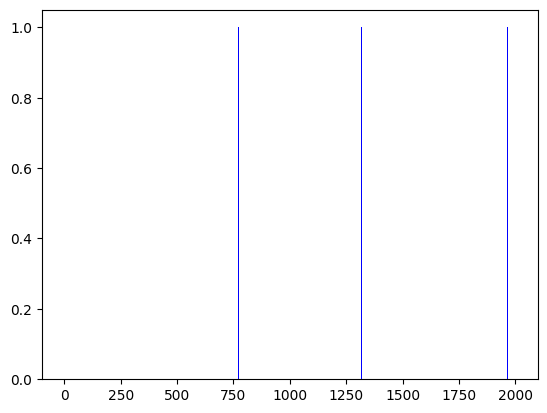

In [29]:
plt.bar(range(len(reward_lst)), reward_lst, color='blue')
plt.show()